#### Importing Libraries

In [1]:
import pandas as pd
import numpy  as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics.pairwise import cosine_similarity

In [2]:
df = pd.read_csv("C:/Users/Shweta/Desktop/RatingDatasets/Amazon - Movies and TV Ratings.csv", index_col=0)

In [3]:
df.head()

,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,Movie10,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
user_id,,,,,,,,,,,,,,,,,,,,,
A3R5OBKS7OM2IR,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AH3QC2PC1VTGP,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A3LKP6WPMP9UKX,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AVIY68KEPQ5ZD,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A1CV1WROP5KTTW,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Visualize missing values (NaN) values using Missingno Library

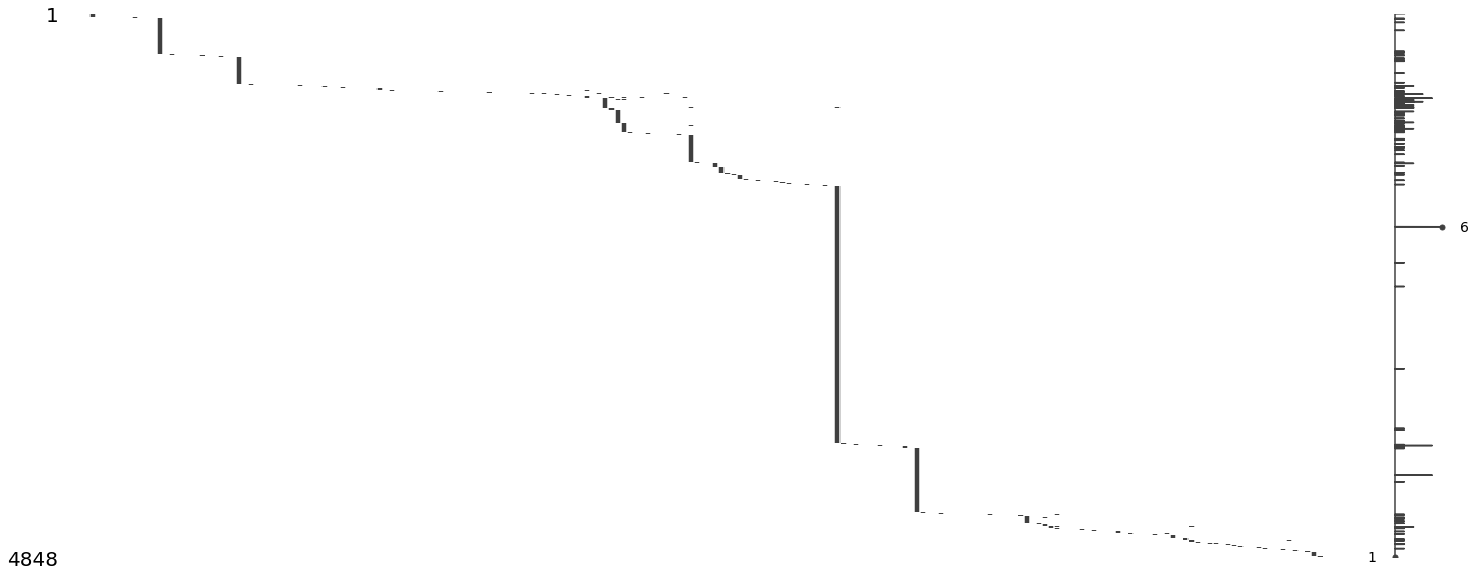

In [4]:
msno.matrix(df)

In [5]:
movie_data = df.stack().reset_index()
movie_data.columns = ['User_ID','Movie','Rating']
movie_data.head()

,User_ID,Movie,Rating
0,A3R5OBKS7OM2IR,Movie1,5.0
1,A3R5OBKS7OM2IR,Movie2,5.0
2,AH3QC2PC1VTGP,Movie3,2.0
3,A3LKP6WPMP9UKX,Movie4,5.0
4,AVIY68KEPQ5ZD,Movie4,5.0


In [6]:
ratings_df_mean = movie_data.groupby('Movie')['Rating'].describe()['mean']
ratings_df_mean

Movie
Movie1      5.000000
Movie10     5.000000
Movie100    4.000000
Movie101    5.000000
Movie102    4.000000
              ...   
Movie95     3.333333
Movie96     5.000000
Movie97     4.800000
Movie98     5.000000
Movie99     4.000000
Name: mean, Length: 206, dtype: float64

In [7]:
ratings_df_count = movie_data.groupby('Movie')['Rating' ].describe()['count']
ratings_df_count 

Movie
Movie1      1.0
Movie10     1.0
Movie100    1.0
Movie101    5.0
Movie102    2.0
           ... 
Movie95     6.0
Movie96     3.0
Movie97     5.0
Movie98     1.0
Movie99     2.0
Name: count, Length: 206, dtype: float64

In [8]:
ratings_mean_count_df = pd.concat([ratings_df_count, ratings_df_mean], axis = 1)
ratings_mean_count_df.reset_index()

,Movie,count,mean
0,Movie1,1.0,5.000000
1,Movie10,1.0,5.000000
2,Movie100,1.0,4.000000
3,Movie101,5.0,5.000000
4,Movie102,2.0,4.000000
...,...,...,...
201,Movie95,6.0,3.333333
202,Movie96,3.0,5.000000
203,Movie97,5.0,4.800000
204,Movie98,1.0,5.000000


#### Filling the missing data with zero

In [9]:
df = df.fillna(0)
df

,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,Movie10,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
user_id,,,,,,,,,,,,,,,,,,,,,
A3R5OBKS7OM2IR,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AH3QC2PC1VTGP,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A3LKP6WPMP9UKX,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AVIY68KEPQ5ZD,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1CV1WROP5KTTW,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A1IMQ9WMFYKWH5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
A1KLIKPUF5E88I,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
A5HG6WFZLO10D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0


#### Recommendation Model

In [11]:
from sklearn.model_selection import train_test_split

#### Splitting Data

In [13]:
train_data, test_data = train_test_split(df, test_size=0.2)

In [14]:
train_data

,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,Movie10,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
user_id,,,,,,,,,,,,,,,,,,,,,
A1BPV5V3MQ8E3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A573HCFMWNT60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1I0FFD42KR1FL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A25C8JBK8BSNE7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A3LQ6XMR25MRJ9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A28L7RYP6FYGN9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A22JVLEGF9IVV6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AO7SCNSMRBN7F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
test_data

,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,Movie10,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
user_id,,,,,,,,,,,,,,,,,,,,,
A2ZLZ2G39EDNF3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A886BTWFDSJRP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A14187VABCPVRC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
A1M0EQWAYGVNVR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A2RLK3FIPGQFGZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AMKWLZ2O66EXY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A3V6Z4RCDGRC44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A2AZNL1PVZTDSI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
def standardization(row):
    """
    Standardization the none rated movies using the  value`s using 
    """
    new_row_value = (row -row.mean())/(row.max()-row.min())
    return new_row_value

In [17]:
movie_rating = train_data.apply(standardization)

In [18]:
movie_rating

,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,Movie10,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
user_id,,,,,,,,,,,,,,,,,,,,,
A1BPV5V3MQ8E3,-0.000258,-0.000258,-0.000258,-0.000258,-0.004126,-0.000258,-0.000258,-0.000258,-0.000258,NaN,...,-0.000774,-0.000516,-0.000258,-0.00165,-0.00067,-0.001083,-0.000258,-0.001031,-0.006859,-0.002321
A573HCFMWNT60,-0.000258,-0.000258,-0.000258,-0.000258,-0.004126,-0.000258,-0.000258,-0.000258,-0.000258,NaN,...,-0.000774,-0.000516,-0.000258,-0.00165,-0.00067,-0.001083,-0.000258,-0.001031,-0.006859,-0.002321
A1I0FFD42KR1FL,-0.000258,-0.000258,-0.000258,-0.000258,-0.004126,-0.000258,-0.000258,-0.000258,-0.000258,NaN,...,-0.000774,-0.000516,-0.000258,-0.00165,-0.00067,-0.001083,-0.000258,-0.001031,-0.006859,-0.002321
A25C8JBK8BSNE7,-0.000258,-0.000258,-0.000258,-0.000258,-0.004126,-0.000258,-0.000258,-0.000258,-0.000258,NaN,...,-0.000774,-0.000516,-0.000258,-0.00165,-0.00067,-0.001083,-0.000258,-0.001031,-0.006859,-0.002321
A3LQ6XMR25MRJ9,-0.000258,-0.000258,-0.000258,-0.000258,-0.004126,-0.000258,-0.000258,-0.000258,-0.000258,NaN,...,-0.000774,-0.000516,-0.000258,-0.00165,-0.00067,-0.001083,-0.000258,-0.001031,-0.006859,-0.002321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A28L7RYP6FYGN9,-0.000258,-0.000258,-0.000258,-0.000258,-0.004126,-0.000258,-0.000258,-0.000258,-0.000258,NaN,...,-0.000774,-0.000516,-0.000258,-0.00165,-0.00067,-0.001083,-0.000258,-0.001031,-0.006859,-0.002321
A22JVLEGF9IVV6,-0.000258,-0.000258,-0.000258,-0.000258,-0.004126,-0.000258,-0.000258,-0.000258,-0.000258,NaN,...,-0.000774,-0.000516,-0.000258,-0.00165,-0.00067,-0.001083,-0.000258,-0.001031,-0.006859,-0.002321
AO7SCNSMRBN7F,-0.000258,-0.000258,-0.000258,-0.000258,-0.004126,-0.000258,-0.000258,-0.000258,-0.000258,NaN,...,-0.000774,-0.000516,-0.000258,-0.00165,-0.00067,-0.001083,-0.000258,-0.001031,-0.006859,-0.002321


In [19]:
movie_similarity = train_data.corr(method='pearson')
movie_similarity.head(27)

,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,Movie10,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
Movie1,1.000000,1.000000,-0.000258,-0.000258,-0.001055,-0.000258,-0.000258,-0.000258,-0.000258,NaN,...,-0.000473,-0.000365,-0.000258,-0.000679,-0.000437,-0.000539,-0.000258,-0.000538,-0.001364,-0.000775
Movie2,1.000000,1.000000,-0.000258,-0.000258,-0.001055,-0.000258,-0.000258,-0.000258,-0.000258,NaN,...,-0.000473,-0.000365,-0.000258,-0.000679,-0.000437,-0.000539,-0.000258,-0.000538,-0.001364,-0.000775
Movie3,-0.000258,-0.000258,1.000000,-0.000258,-0.001055,-0.000258,-0.000258,-0.000258,-0.000258,NaN,...,-0.000473,-0.000365,-0.000258,-0.000679,-0.000437,-0.000539,-0.000258,-0.000538,-0.001364,-0.000775
Movie4,-0.000258,-0.000258,-0.000258,1.000000,-0.001055,-0.000258,-0.000258,-0.000258,-0.000258,NaN,...,-0.000473,-0.000365,-0.000258,-0.000679,-0.000437,-0.000539,-0.000258,-0.000538,-0.001364,-0.000775
Movie5,-0.001055,-0.001055,-0.001055,-0.001055,1.000000,-0.001055,-0.001055,-0.001055,-0.001055,NaN,...,-0.001934,-0.001492,-0.001055,-0.002778,-0.001786,-0.002206,-0.001055,-0.002201,-0.005579,-0.003169
Movie6,-0.000258,-0.000258,-0.000258,-0.000258,-0.001055,1.000000,-0.000258,-0.000258,-0.000258,NaN,...,-0.000473,-0.000365,-0.000258,-0.000679,-0.000437,-0.000539,-0.000258,-0.000538,-0.001364,-0.000775
Movie7,-0.000258,-0.000258,-0.000258,-0.000258,-0.001055,-0.000258,1.000000,-0.000258,-0.000258,NaN,...,-0.000473,-0.000365,-0.000258,-0.000679,-0.000437,-0.000539,-0.000258,-0.000538,-0.001364,-0.000775
Movie8,-0.000258,-0.000258,-0.000258,-0.000258,-0.001055,-0.000258,-0.000258,1.000000,-0.000258,NaN,...,-0.000473,-0.000365,-0.000258,-0.000679,-0.000437,-0.000539,-0.000258,-0.000538,-0.001364,-0.000775
Movie9,-0.000258,-0.000258,-0.000258,-0.000258,-0.001055,-0.000258,-0.000258,-0.000258,1.000000,NaN,...,-0.000473,-0.000365,-0.000258,-0.000679,-0.000437,-0.000539,-0.000258,-0.000538,-0.001364,-0.000775
Movie10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
movie_similarity_df =pd.DataFrame(movie_similarity,index=train_data.columns, columns=train_data.columns)

#### Similarity matrix

In [21]:
movie_similarity_df 

,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,Movie10,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
Movie1,1.000000,1.000000,-0.000258,-0.000258,-0.001055,-0.000258,-0.000258,-0.000258,-0.000258,NaN,...,-0.000473,-0.000365,-0.000258,-0.000679,-0.000437,-0.000539,-0.000258,-0.000538,-0.001364,-0.000775
Movie2,1.000000,1.000000,-0.000258,-0.000258,-0.001055,-0.000258,-0.000258,-0.000258,-0.000258,NaN,...,-0.000473,-0.000365,-0.000258,-0.000679,-0.000437,-0.000539,-0.000258,-0.000538,-0.001364,-0.000775
Movie3,-0.000258,-0.000258,1.000000,-0.000258,-0.001055,-0.000258,-0.000258,-0.000258,-0.000258,NaN,...,-0.000473,-0.000365,-0.000258,-0.000679,-0.000437,-0.000539,-0.000258,-0.000538,-0.001364,-0.000775
Movie4,-0.000258,-0.000258,-0.000258,1.000000,-0.001055,-0.000258,-0.000258,-0.000258,-0.000258,NaN,...,-0.000473,-0.000365,-0.000258,-0.000679,-0.000437,-0.000539,-0.000258,-0.000538,-0.001364,-0.000775
Movie5,-0.001055,-0.001055,-0.001055,-0.001055,1.000000,-0.001055,-0.001055,-0.001055,-0.001055,NaN,...,-0.001934,-0.001492,-0.001055,-0.002778,-0.001786,-0.002206,-0.001055,-0.002201,-0.005579,-0.003169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Movie202,-0.000539,-0.000539,-0.000539,-0.000539,-0.002206,-0.000539,-0.000539,-0.000539,-0.000539,NaN,...,-0.000988,-0.000763,-0.000539,-0.001419,-0.000913,1.000000,-0.000539,-0.001125,-0.002851,-0.001619
Movie203,-0.000258,-0.000258,-0.000258,-0.000258,-0.001055,-0.000258,-0.000258,-0.000258,-0.000258,NaN,...,-0.000473,-0.000365,-0.000258,-0.000679,-0.000437,-0.000539,1.000000,-0.000538,-0.001364,-0.000775
Movie204,-0.000538,-0.000538,-0.000538,-0.000538,-0.002201,-0.000538,-0.000538,-0.000538,-0.000538,NaN,...,-0.000986,-0.000761,-0.000538,-0.001416,-0.000911,-0.001125,-0.000538,1.000000,-0.002845,-0.001616
Movie205,-0.001364,-0.001364,-0.001364,-0.001364,-0.005579,-0.001364,-0.001364,-0.001364,-0.001364,NaN,...,-0.002500,-0.001929,-0.001364,-0.003590,-0.002309,-0.002851,-0.001364,-0.002845,1.000000,-0.004096


In [23]:
def recommendation(movie, train_data):
    similar_value = movie_similarity_df[movie]*(train_data)
    similar_value  =  similar_value.sort_values(ascending = False)
    
    return  similar_value

In [24]:
print(recommendation("Movie1", 5))

Movie1      5.00000
Movie2      5.00000
Movie80    -0.00129
Movie151   -0.00129
Movie171   -0.00129
             ...   
Movie152        NaN
Movie154        NaN
Movie156        NaN
Movie164        NaN
Movie195        NaN
Name: Movie1, Length: 206, dtype: float64
